In [17]:
# Import required libraries
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [18]:
path = Path("Resources/final_combined_data.csv")
df = pd.read_csv(path)
df.head()

,row_id,movie_name,rating,votes,meta_score,genre0,genre1,genre2,genre3,pr_rating,...,cast1,cast2,cast3,cast4,director,number_rating,weekly_rank,weekly_hours_viewed,weekly_views,cumulative_weeks_in_top_10
0,506,1917,8.2,654000.0,78,"Action, Drama, War",Action,Drama,War,R,...,Dean-Charles Chapman,George MacKay,Daniel Mays,Colin Firth,Sam Mendes,4,7,10840000,NaN,1
1,1356,21 Jump Street,7.2,589000.0,69,"Action, Comedy, Crime",Action,Comedy,Crime,R,...,Jonah Hill,Channing Tatum,Ice Cube,Brie Larson,Phil LordChristopher Miller,4,6,11690000,NaN,1
2,1698,6 Underground,6.1,192000.0,41,"Action, Thriller",Action,Thriller,NaN,R,...,Ryan Reynolds,Mélanie Laurent,Manuel Garcia-Rulfo,Ben Hardy,Michael Bay,4,5,8730000,NaN,3
3,1698,6 Underground,6.1,192000.0,41,"Action, Thriller",Action,Thriller,NaN,R,...,Ryan Reynolds,Mélanie Laurent,Manuel Garcia-Rulfo,Ben Hardy,Michael Bay,4,7,7440000,NaN,2
4,1698,6 Underground,6.1,192000.0,41,"Action, Thriller",Action,Thriller,NaN,R,...,Ryan Reynolds,Mélanie Laurent,Manuel Garcia-Rulfo,Ben Hardy,Michael Bay,4,9,7770000,NaN,1


In [19]:
filtered_df = df[['row_id', 'rating', 'votes', 'meta_score', 'number_rating', 'weekly_rank', 'weekly_hours_viewed', 'cumulative_weeks_in_top_10' ]]
filtered_df.head()

,row_id,rating,votes,meta_score,number_rating,weekly_rank,weekly_hours_viewed,cumulative_weeks_in_top_10
0,506,8.2,654000.0,78,4,7,10840000,1
1,1356,7.2,589000.0,69,4,6,11690000,1
2,1698,6.1,192000.0,41,4,5,8730000,3
3,1698,6.1,192000.0,41,4,7,7440000,2
4,1698,6.1,192000.0,41,4,9,7770000,1


In [20]:
#target (y variable)
y = filtered_df['cumulative_weeks_in_top_10']

#feature (X variable)
X = filtered_df.drop(columns=['cumulative_weeks_in_top_10'])

In [21]:
#split data and use randfom_state of 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [22]:
# # instantiate logistical regression model with random_state of 1
# model = LogisticRegression(random_state=1)

# #fit model using training data
# model.fit(X_train, y_train)

In [23]:
#creating StandardScaler instanxe
scaler = StandardScaler()

In [24]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [25]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [27]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [28]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [29]:
# Calculating the confusion matrix
con_matrix = confusion_matrix(y_test, predictions)

# Get number of classes
num_classes = con_matrix.shape[0]
con_matrix_df = pd.DataFrame(
    con_matrix, index = [f"Actual {i}" for i in range(num_classes)], columns = [f"Predicted {i}" for i in range(num_classes)]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [30]:
# Displaying results
print("Confusion Matrix")
display(con_matrix_df)
print(f"Accuracy Score : {acc_score}")

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9,Predicted 10,Predicted 11,Predicted 12
Actual 0,22,25,3,2,0,0,0,0,0,0,0,0,0
Actual 1,22,4,0,1,0,0,0,0,0,0,0,0,0
Actual 2,14,2,1,1,0,0,0,0,1,0,0,0,0
Actual 3,4,0,1,0,0,0,0,1,0,0,0,0,0
Actual 4,2,0,0,4,0,3,0,0,0,0,0,0,0
Actual 5,1,0,0,0,0,0,0,0,1,0,0,0,0
Actual 6,1,0,0,0,0,0,0,1,0,0,0,0,0
Actual 7,0,0,0,1,0,0,0,0,0,0,0,0,0
Actual 8,0,0,0,0,0,0,0,0,0,0,0,0,0
Actual 9,0,0,0,0,0,0,0,0,0,0,0,0,0


Accuracy Score : 0.2231404958677686


In [31]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.313996359423555, 'weekly_hours_viewed'),
 (0.16099389274970924, 'weekly_rank'),
 (0.13022413681521905, 'row_id'),
 (0.12678978371703503, 'votes'),
 (0.11859850340918136, 'meta_score'),
 (0.10640092304878779, 'rating'),
 (0.042996400836512565, 'number_rating')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

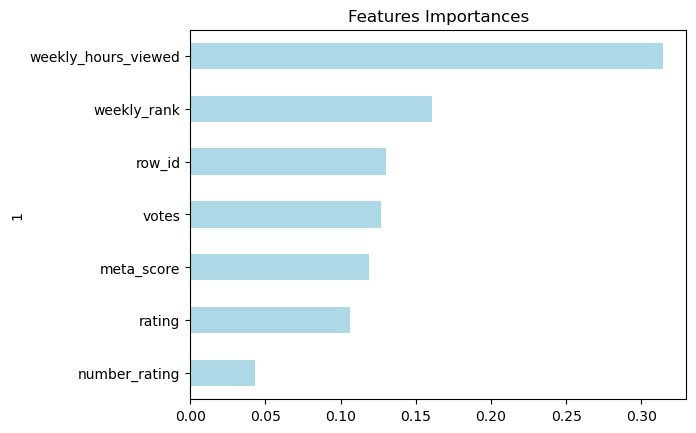

In [32]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightblue', title= 'Features Importances', legend=False)